**CS 412 Project - Car Price Prediction**

In [55]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from sklearn import metrics

%matplotlib inline

In [57]:
filename = "train.csv"
df = pd.read_csv(join(path_prefix, filename), index_col=0)

df.head(10)

,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
ID,,,,,,,,,,,
0,vw,Golf,2020.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,NaN,34495
1,audi,A3,2014.0,Manual,48037.0,Diesel,74.3,1.6,0.0,NaN,12239
2,ford,Focus,2019.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,NaN,17000
3,toyota,Yaris,2014.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,NaN,10499
4,ford,Focus,2014.0,Manual,45158.0,Petrol,56.5,1.0,30.0,NaN,7490
5,hyundi,Tucson,2019.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,NaN,145.0,26990
6,merc,E Class,2014.0,Automatic,75833.0,Diesel,57.7,2.1,125.0,NaN,11972
7,vw,Tiguan,2019.0,Manual,107.0,Petrol,40.9,1.5,145.0,NaN,21990
8,vw,Passat,2015.0,Manual,30143.0,Diesel,70.6,1.6,20.0,NaN,9750


In [58]:
df.shape

(60000, 11)

In [59]:
np.isnan(df['tax'][5])

True

In [60]:
df['tax(£)'][5]

145.0

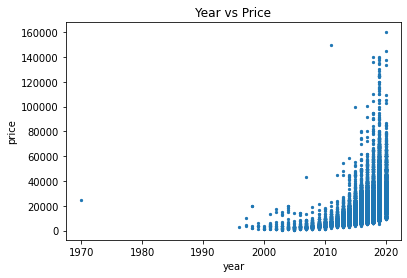

In [40]:
ax = df[['year', 'price']].plot.scatter(x='year', y='price', s=5)  # s-> marker size
ax.set_title('Year vs Price')
plt.show()

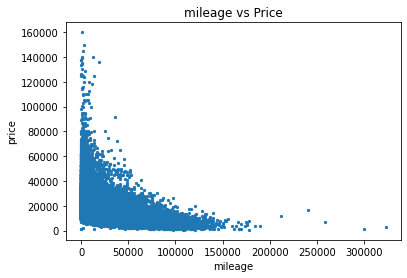

<Figure size 720x144 with 0 Axes>

In [24]:
ax = df[['mileage', 'price']].plot.scatter(x='mileage', y='price', s=5)  # s-> marker size
ax.set_title('mileage vs Price')
plt.show()

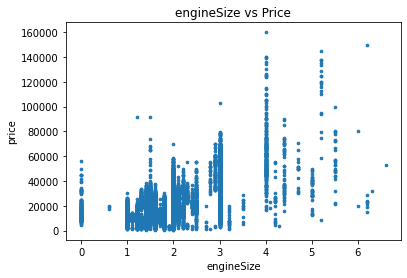

In [28]:
ax = df[['engineSize', 'price']].plot.scatter(x='engineSize', y='price', s=7)  # s-> marker size
ax.set_title('engineSize vs Price')
plt.show()

In [61]:
for i in range(0,len(df)):
  if np.isnan(df['tax'][i]) == True:
    df['tax'][i] = float(df['tax(£)'][i])
  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


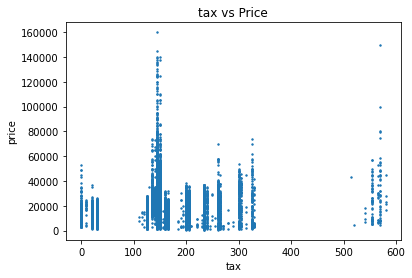

In [33]:
ax = df[['tax', 'price']].plot.scatter(x='tax', y='price', s=2
                                  )  # s-> marker size
ax.set_title('tax vs Price')
plt.show()

In [59]:
df.head(10)

,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£),price
ID,,,,,,,,,,,
0,vw,Golf,2020.0,Semi-Auto,1506.0,Petrol,32.8,2.0,145.0,NaN,34495
1,audi,A3,2014.0,Manual,48037.0,Diesel,74.3,1.6,0.0,NaN,12239
2,ford,Focus,2019.0,Automatic,7267.0,Diesel,54.3,1.5,145.0,NaN,17000
3,toyota,Yaris,2014.0,Automatic,8290.0,Hybrid,80.7,1.5,0.0,NaN,10499
4,ford,Focus,2014.0,Manual,45158.0,Petrol,56.5,1.0,30.0,NaN,7490
5,hyundi,Tucson,2019.0,Semi-Auto,6650.0,Hybrid,50.4,1.6,145.0,145.0,26990
6,merc,E Class,2014.0,Automatic,75833.0,Diesel,57.7,2.1,125.0,NaN,11972
7,vw,Tiguan,2019.0,Manual,107.0,Petrol,40.9,1.5,145.0,NaN,21990
8,vw,Passat,2015.0,Manual,30143.0,Diesel,70.6,1.6,20.0,NaN,9750


In [62]:
df = df.drop("tax(£)", axis=1)

In [63]:
df = df.dropna()

In [ ]:
print(df.transmission.unique())

['Semi-Auto' 'Manual' 'Automatic' 'Other']


In [ ]:
print(df.fuelType.unique())

['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


In [ ]:
print(df.brand.unique())

['vw' 'audi' 'ford' 'toyota' 'hyundi' 'merc' 'bmw' 'skoda']


In [64]:
data = pd.get_dummies(df['transmission'])
data2 = pd.get_dummies(df['brand'])
data3 = pd.get_dummies(df['fuelType'])  

In [65]:
df = df.drop(columns=["brand","transmission","fuelType"],axis=1)

In [66]:
df_result = pd.concat([df,data,data2,data3], axis=1, join='inner')

In [67]:
df_result.describe()

,year,mileage,mpg,engineSize,tax,price,Automatic,Manual,Other,Semi-Auto,audi,bmw,ford,hyundi,merc,skoda,toyota,vw,Diesel,Electric,Hybrid,Other,Petrol
count,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000,59514.000000
mean,2017.110125,22973.581141,55.730788,1.702435,118.893538,17847.664818,0.219780,0.519592,0.000084,0.260544,0.125718,0.124962,0.210018,0.056323,0.152283,0.074369,0.078570,0.177756,0.445189,0.000034,0.036109,0.002940,0.515727
std,2.119631,21276.146171,16.535338,0.585515,64.530242,10209.475486,0.414101,0.499620,0.009166,0.438935,0.331534,0.330679,0.407324,0.230546,0.359298,0.262373,0.269068,0.382311,0.496991,0.005797,0.186563,0.054147,0.499757
min,1970.000000,2.000000,1.100000,0.000000,0.000000,495.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,7025.000000,47.100000,1.200000,125.000000,10795.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,17165.000000,55.400000,1.600000,145.000000,15750.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2019.000000,32412.000000,62.800000,2.000000,145.000000,21999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2020.000000,323003.000000,470.800000,6.600000,580.000000,159999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_result

,model,year,mileage,mpg,engineSize,tax,price,Automatic,Manual,Other,Semi-Auto,audi,bmw,ford,hyundi,merc,skoda,toyota,vw,Diesel,Electric,Hybrid,Other,Petrol
ID,,,,,,,,,,,,,,,,,,,,,,,,
0,Golf,2020.0,1506.0,32.8,2.0,145.0,34495,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,A3,2014.0,48037.0,74.3,1.6,0.0,12239,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,Focus,2019.0,7267.0,54.3,1.5,145.0,17000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,Yaris,2014.0,8290.0,80.7,1.5,0.0,10499,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,Focus,2014.0,45158.0,56.5,1.0,30.0,7490,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,C Class,2019.0,10577.0,57.7,2.0,145.0,29549,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
59996,Golf,2016.0,47006.0,40.4,2.0,200.0,17975,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
59997,Passat,2014.0,57973.0,61.4,2.0,30.0,7750,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [49]:
df_result.shape

(59514, 24)

In [68]:
from sklearn.model_selection import train_test_split
target = df_result['price']
b = df_result.drop(columns=['price','model'],axis=0)
X_train, X_val, y_train, y_val = train_test_split(b,target,test_size=0.20, random_state=0)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(47611, 22) (11903, 22) (47611,) (11903,)


In [80]:
y_val

ID
9522     10199
23023    24892
51752    18798
30334    23000
37089     9490
         ...  
8737     28499
3879      9000
11242     8990
45178    11990
31320     9890
Name: price, Length: 11903, dtype: int64

In [51]:
X_train

,year,mileage,mpg,engineSize,tax,Automatic,Manual,Other,Semi-Auto,audi,bmw,ford,hyundi,merc,skoda,toyota,vw,Diesel,Electric,Hybrid,Other,Petrol
ID,,,,,,,,,,,,,,,,,,,,,,
41703,2019.0,6968.0,65.7,2.0,145.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
48188,2015.0,24412.0,52.3,1.0,125.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
15384,2015.0,24254.0,60.1,1.0,20.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
43447,2015.0,42200.0,54.3,1.4,30.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
41645,2014.0,44489.0,58.9,2.1,145.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46269,2019.0,5169.0,53.3,1.5,145.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
52847,2017.0,11308.0,58.9,2.1,145.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
42956,2017.0,32829.0,62.8,2.0,30.0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
n_values = [50,100,150,200]
rmse_val = []
for i in range(len(n_values)):
  model = RandomForestRegressor(n_estimators = n_values[i], random_state = 0)
  model.fit(X_train, y_train)
  pred=model.predict(X_val)
  error = sqrt(mean_squared_error(y_val,pred)) 
  rmse_val.append(error) 
  print('RMSE value when n_estimators=' , n_values[i] , 'is:', error)

RMSE value when n_estimators= 50 is: 2516.5513482396204
RMSE value when n_estimators= 100 is: 2501.5209606075036
RMSE value when n_estimators= 150 is: 2493.3718147753707
RMSE value when n_estimators= 200 is: 2494.4045374390334


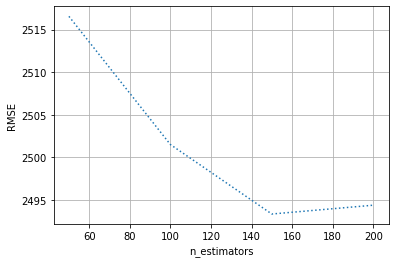

In [54]:
x=[50,100,150,200]
y=rmse_val
plt.plot(x,y,ls=('dotted'))
plt.rc('lines', linewidth=2, linestyle='-', marker='.')
plt.grid(linestyle='-')
plt.xlabel("n_estimators")
plt.ylabel("RMSE")
plt.show()

In [70]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 150, random_state = 0)
model2.fit(X_train, y_train)
y_pred=model2.predict(X_val)
first_result = pd.DataFrame({'y_val':y_val,'y_pred':y_pred,'Residuals':(y_val-y_pred)})
print(first_result.shape,"\n",first_result)

(11903, 3) 
        y_val        y_pred    Residuals
ID                                     
9522   10199   9668.633333   530.366667
23023  24892  21930.380000  2961.620000
51752  18798  16870.980000  1927.020000
30334  23000  18948.560000  4051.440000
37089   9490   9329.953333   160.046667
...      ...           ...          ...
8737   28499  28030.706667   468.293333
3879    9000   8402.533333   597.466667
11242   8990   9273.066667  -283.066667
45178  11990  11660.153333   329.846667
31320   9890  10507.466667  -617.466667

[11903 rows x 3 columns]


In [71]:
model2.score(X_val,y_val)

0.9381075640317025

**TEST**

In [72]:
filename2 = "test.csv"
df2 = pd.read_csv(join(path_prefix, filename2), index_col=0)

df2.head(100)

,brand,model,year,transmission,mileage,fuelType,mpg,engineSize,tax,tax(£)
ID,,,,,,,,,,
0,ford,Edge,2017.0,Manual,18116.0,Diesel,48.7,2.0,145.0,NaN
1,merc,CLA Class,2020.0,Automatic,1007.0,Petrol,44.8,1.3,145.0,NaN
2,bmw,1 Series,2017.0,Manual,24766.0,Petrol,56.5,1.5,150.0,NaN
3,audi,Q3,2017.0,Manual,29860.0,Diesel,50.4,2.0,145.0,NaN
4,vw,Golf,2016.0,Manual,12822.0,Petrol,39.8,2.0,200.0,NaN
...,...,...,...,...,...,...,...,...,...,...
95,merc,E Class,2019.0,Automatic,12423.0,Petrol,32.5,3.0,145.0,NaN
96,audi,Q8,2019.0,Semi-Auto,10002.0,Diesel,32.8,3.0,150.0,NaN
97,vw,Up,2020.0,Manual,32.0,Petrol,51.4,1.0,145.0,NaN


In [73]:
df2.shape

(25555, 10)

In [74]:
df2 = df2.drop("tax(£)", axis=1)

In [75]:
mean_value=df2['mileage'].mean()
df2['mileage'].fillna(value=mean_value, inplace=True)
mean_value=df2['tax'].mean()
df2['tax'].fillna(value=mean_value, inplace=True)
mean_value=df2['mpg'].mean()
df2['mpg'].fillna(value=mean_value, inplace=True)
mean_value=df2['engineSize'].mean()
df2['engineSize'].fillna(value=mean_value, inplace=True)
mean_value=df2['year'].mean()
df2['year'].fillna(value=mean_value, inplace=True)

In [88]:
df2.shape

(25555, 9)

In [89]:
df2['brand'][0] 

'ford'

In [41]:
df2.brand.unique()

array(['ford', 'merc', 'bmw', 'audi', 'vw', 'toyota', 'skoda', 'hyundi',
       nan], dtype=object)

In [76]:
import random
s = 0
brand_list = ['vw' ,'audi' ,'ford', 'toyota', 'merc', 'bmw', 'skoda','hyundi']
for i in range(len(df2)):
  if (pd.isnull(df2['brand'][i])):
    df2["brand"][i] = brand_list[random.randint(0, 7)]   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
transmissions = ['Semi-Auto' ,'Manual', 'Automatic' ,'Other']
for i in range(len(df2)):
  if (pd.isnull(df2['transmission'][i])):
    df2["transmission"][i] = transmissions[random.randint(0, 3)] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df2['transmission'].isnull().sum()

0

In [78]:
fuels = ['Petrol', 'Diesel', 'Hybrid' ,'Other', 'Electric']
for i in range(len(df2)):
  if (pd.isnull(df2['fuelType'][i])):
    df2["fuelType"][i] = fuels[random.randint(0, 4)] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
df2['fuelType'].isnull().sum()

0

In [79]:
datat = pd.get_dummies(df2['transmission'])
data2t = pd.get_dummies(df2['brand'])
data3t = pd.get_dummies(df2['fuelType'])  

In [80]:
df_result2 = pd.concat([df2,datat,data2t,data3t], axis=1, join='inner')

In [81]:
df_result2 = df_result2.drop(columns=["transmission","brand","fuelType","model"],axis=1)

In [82]:
print(df_result2.shape,"\n",df_result2.head(10))

(25555, 22) 
       year  mileage   mpg  engineSize  ...  Electric  Hybrid  Other  Petrol
ID                                     ...                                 
0   2017.0  18116.0  48.7         2.0  ...         0       0      0       0
1   2020.0   1007.0  44.8         1.3  ...         0       0      0       1
2   2017.0  24766.0  56.5         1.5  ...         0       0      0       1
3   2017.0  29860.0  50.4         2.0  ...         0       0      0       0
4   2016.0  12822.0  39.8         2.0  ...         0       0      0       1
5   2019.0   2145.0  53.3         2.0  ...         0       0      0       0
6   2016.0  18777.0  49.6         3.0  ...         0       0      0       0
7   2019.0  10579.0  62.8         2.0  ...         0       0      0       0
8   2016.0  22084.0  60.1         2.0  ...         0       0      0       0
9   2019.0   4882.0  52.3         1.6  ...         0       0      0       0

[10 rows x 22 columns]


In [83]:
df_result2

,year,mileage,mpg,engineSize,tax,Automatic,Manual,Other,Semi-Auto,audi,bmw,ford,hyundi,merc,skoda,toyota,vw,Diesel,Electric,Hybrid,Other,Petrol
ID,,,,,,,,,,,,,,,,,,,,,,
0,2017.0,18116.0,48.7,2.0,145.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2020.0,1007.0,44.8,1.3,145.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2017.0,24766.0,56.5,1.5,150.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,2017.0,29860.0,50.4,2.0,145.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2016.0,12822.0,39.8,2.0,200.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25550,2020.0,1251.0,30.1,2.8,145.0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
25551,2020.0,3506.0,40.4,2.0,145.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
25552,2020.0,3679.0,53.3,2.0,135.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [84]:
X_train

,year,mileage,mpg,engineSize,tax,Automatic,Manual,Other,Semi-Auto,audi,bmw,ford,hyundi,merc,skoda,toyota,vw,Diesel,Electric,Hybrid,Other,Petrol
ID,,,,,,,,,,,,,,,,,,,,,,
41703,2019.0,6968.0,65.7,2.0,145.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
48188,2015.0,24412.0,52.3,1.0,125.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
15384,2015.0,24254.0,60.1,1.0,20.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
43447,2015.0,42200.0,54.3,1.4,30.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
41645,2014.0,44489.0,58.9,2.1,145.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46269,2019.0,5169.0,53.3,1.5,145.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
52847,2017.0,11308.0,58.9,2.1,145.0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
42956,2017.0,32829.0,62.8,2.0,30.0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [85]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 150, random_state = 0)
model2.fit(X_train, y_train)
y_pred=model2.predict(df_result2)
final_preds = pd.DataFrame({'price':y_pred})

In [86]:
final_preds.head(10)

,price
0,19800.520000
1,28501.926667
2,14630.580000
3,20104.766667
4,20769.546667
5,30883.366667
6,22074.253333
7,24674.780000
8,14607.033333
9,22320.773333


In [87]:
final_preds.shape

(25555, 1)

In [88]:
final_preds.to_csv('submission.csv')